## Skoltech
## Intro to data science, fall 2025
## Assignment 2

### Goals
- Data investigation and visualization techniques
- Feature engineering and feature selection. GridSearch. Cross-validation
- Classification models 


## HW scoring clarifications

- You have to fill the google form for each question (e.g. 1, 2, 3, etc.) and each 'subtask' (e.g. 1.1, 1.3; 2.3, 2.2, etc.). You will receive a copy of your answers to your mail from Google. Wait for a while and attempt to send the form one more time in case you don't get it (only the last submission is taken into account). Contact Andrey Gladkov if the situation repeats.

- Answers in Google forms will be checked automatically. Manual review of the work will also be done.  

- All questions are compulsory.

- You have to submit filled `.ipynb` file **to the canvas**. Make sure the answers to the questions are outlined there. In case of discrepancies, this file will have a priority to Google form answers.

- `.ipynb` file must be **linearly executable** (`Kernel -> Restart & Run All -> No ERROR cells`). It is your task to make it so. ```If this condition is not satisfied, we will be forced to lower the grade.```

- All your answers must be justified by calculations / plots. They don't have to be detailed, but must be present.

- You do not need to defend an assignment.



# Submiting answers

Google form to submit your answers: https://forms.gle/Duvz5tiBtethVNHw8

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is an ``integer number``, you must write it as it is, without zeros after floating point, e.g. 47

---

If your answer is a ``float number``, you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they must be **placed in the order specified by the task** and divided by a comma, e.g.:

*Find the mean and median of the feature*. If 34.876 stands for the mean and 35.475 for the median, your answer must be 34.876,35.475

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them via telegram chat, topic 'HW2'.

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data investigation and visualization

Let's take a closer look at the data.

In [8]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

Calculate the 25th percentile (Q1) and 75th percentile (Q3) of the `CreditScore` for people who are married and not married. What is the interquartile range (IQR = Q3 - Q1) for both cases?

*Sample answer:* 5.870,0.101


In [10]:
q1_mar = df[df['Married'] == True ]['CreditScore'].quantile(0.25)
q3_mar = df[df['Married'] == True]['CreditScore'].quantile(0.75)
q1_not_mar = df[df['Married'] == False]['CreditScore'].quantile(0.25)
q3_not_mar = df[df['Married'] == False]['CreditScore'].quantile(0.75)
print (f'IQR for married and non-married people: {q3_mar-q1_mar:.3f},{q3_not_mar-q1_not_mar:.3f}')

IQR for married and non-married people: 4.000,1.000


### Q1.2

#### People working in which industry have the lowest income on average? Report this income.
*Sample answer:* Energy,56.907

In [12]:
mean_income = df.groupby('Industry')['Income'].mean()
industry = mean_income.idxmin()
income = mean_income.min()
print(f"Industry with lowest income: {industry},{income:.3f}")

Industry with lowest income: Real Estate,111.267


### Q1.3

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and Industry. How many Asian people work in Energy?

In [14]:
crosstab = pd.crosstab(df['Ethnicity'], df['Industry'])
print(f"Number of Asian people working in Energy: {crosstab.loc['Asian', 'Energy']}")

Number of Asian people working in Energy: 14


### Q1.4

Let's assume that the column 'YearsEmployed' counts years from the first employment until the current moment. Given that, build a [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) for the age of the first employment. Don't forget to give your graph a title and name the axes.Make sure to run `plt.show()` to hide unnecessary service information. What is the median age of starting work?

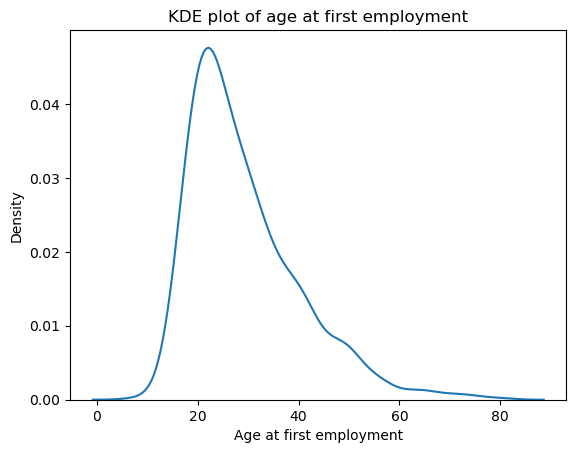

In [16]:
df['Start'] = df['Age'] - df['YearsEmployed']
sns.kdeplot(data=df, x='Start')
plt.title('KDE plot of age at first employment')
plt.xlabel('Age at first employment')
plt.ylabel('Density')
plt.show()

In [17]:
median_age = df['Start'].median()
print(f"Median age of starting work: {median_age:.3f}")

Median age of starting work: 26.540


### Q1.5

Let's visualize the distribution of `Income`. Build a [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) for this feature. Don't forget to give your graph a title ('Distribution of income') and name the y-axes ('Income'). Make sure to run `plt.show()` to hide unnecessary service information.

Do you notice anything strange? What are 3 maximal values of income? Write them **as integers in descending order**.
*Sample answer:* 30000,20000,10000

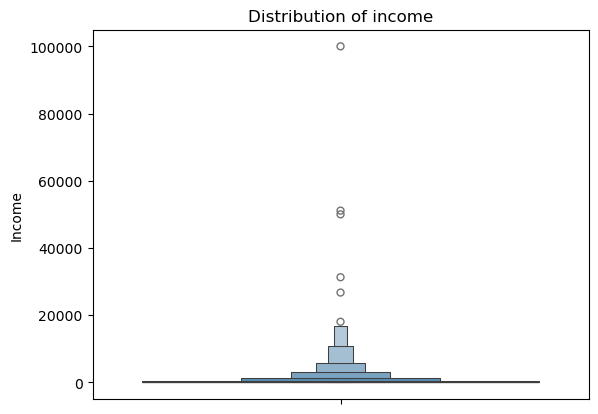

Maximal values of income: 100000,51100,50000


In [19]:
sns.boxenplot(data=df, y='Income')
plt.title('Distribution of income')
plt.ylabel('Income')
plt.show()
income = list(df['Income'].nlargest(3))
print(f'Maximal values of income: {income[0]},{income[1]},{income[2]}')

### Q1.6

Outliers can affect the quality of machine learning algorithms, especially when the amount of data is insufficient. Drop all the values of `Income` above 15000 in the dataset. Plot the boxenplot for a new dataset (mind the requirements for the title, axis naming and `plt.show()`). What share of entries has been dropped? (the answer should be between $0$ and $1$).

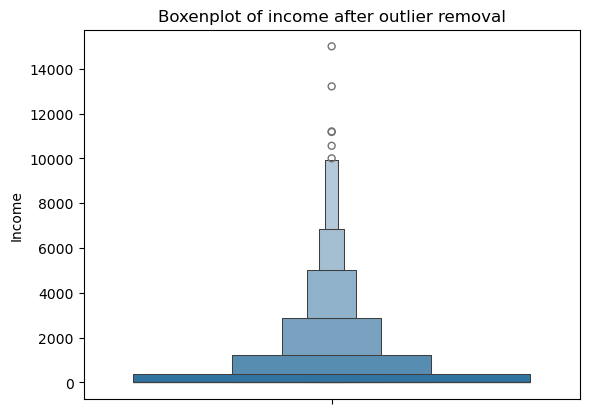

Share of entries has been dropped: 0.010


In [21]:
ddf = df[df['Income'] <= 15000]
dropped = (len(df) - len (ddf)) / len(df)
sns.boxenplot(data = ddf, y='Income')
plt.title('Boxenplot of income after outlier removal')
plt.ylabel('Income')
plt.show()

print(f"Share of entries has been dropped: {dropped:.3f}")

### Q1.7

Plot [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) for `Ethnicity` as x-axis, `Income` as y-axis and set `Married` as a `col`.

Validate the following hypothesis: **"Married people of all ethnicities, except for Others, have more income, than unmarried people of the same ethnicity".**
Your answer must be YES or NO without any additional symbols.

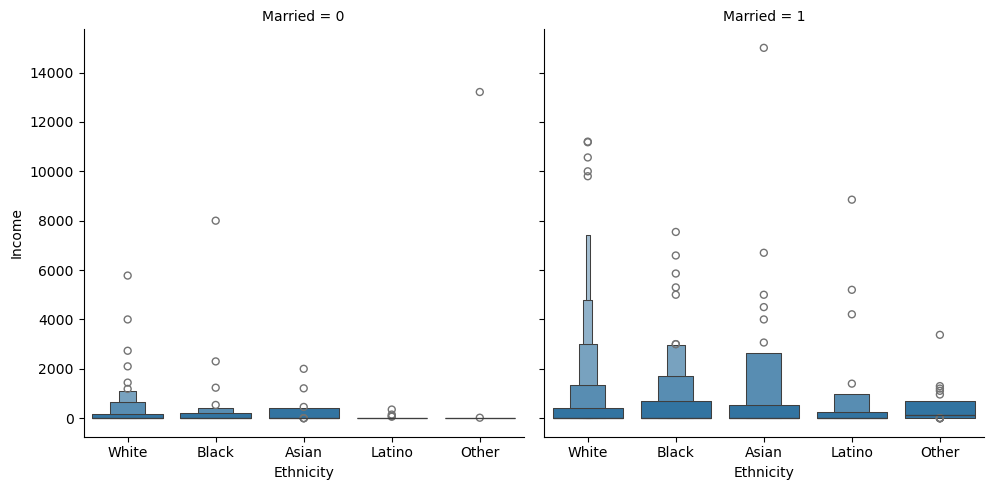

In [23]:
sns.catplot(data=ddf, x="Ethnicity", y="Income", col="Married", kind='boxen')
plt.show()

In [24]:
print ('YES')

YES


### Q1.8

Plot [barplot](https://seaborn.pydata.org/generated/seaborn.catplot.html), taking `Debt` for x-axis, `Industry` for y-axis and `Approved` as a hue. Make sure the axes are named. What are the industries with the highest average debt of people for approved (Approved=1) and rejected (Approved=0) credit applications?

*Answer format (example):* `Utilities,Energy`

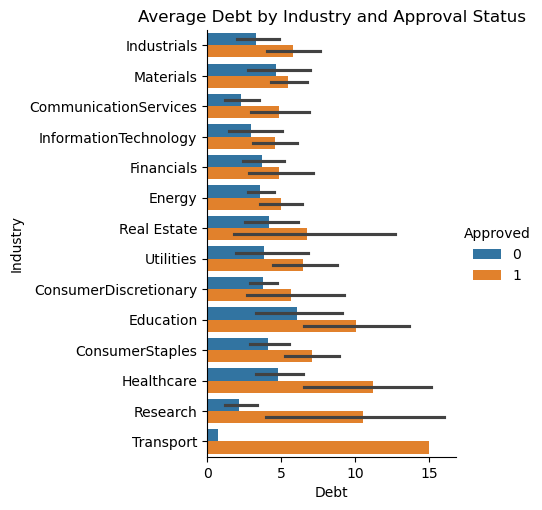

In [26]:
sns.catplot(data=ddf, x="Debt", y="Industry", hue="Approved", kind='bar')
plt.title('Average Debt by Industry and Approval Status')
plt.show()

In [27]:
print ('Transport,Education')

Transport,Education


### Q1.9

Create a [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) showing the distribution of `YearsEmployed` across different industries. Name the axes. Which industry has the highest median years of employment? If there's a tie, choose the first one alphabetically.


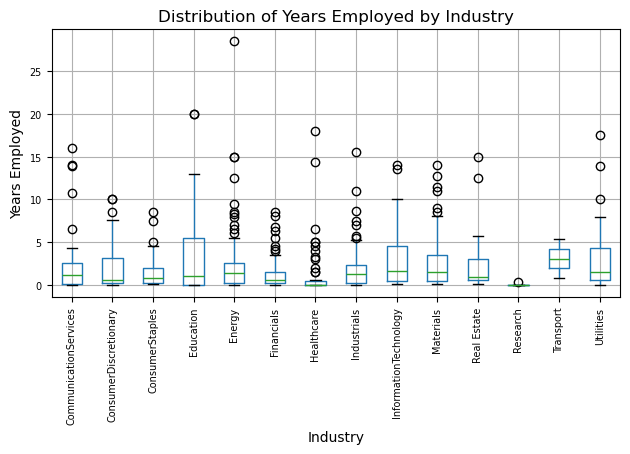

In [29]:
ddf.boxplot(column='YearsEmployed', by='Industry', rot=90, fontsize=7)
plt.xlabel('Industry')
plt.ylabel('Years Employed')
plt.title('Distribution of Years Employed by Industry')
plt.suptitle('')
plt.tight_layout() 
plt.show()

In [30]:
medians = ddf.groupby('Industry')['YearsEmployed'].median().sort_values(ascending=False)
print(medians)

Industry
Transport                3.0625
InformationTechnology    1.6250
Materials                1.5000
Utilities                1.4800
Energy                   1.3750
Industrials              1.2075
CommunicationServices    1.1650
Education                1.0000
Real Estate              0.9375
ConsumerStaples          0.7500
ConsumerDiscretionary    0.5000
Financials               0.5000
Healthcare               0.0000
Research                 0.0000
Name: YearsEmployed, dtype: float64


In [31]:
print ('Transport')

Transport


### Q1.10

Create a heatmap showing the correlation matrix (`method=kendall`) between numerical features: `Age`, `Debt`, `InvestmentScore`, `YearsEmployed`, `CreditScore`, and `Income`. Which pair of features has the highest positive correlation?


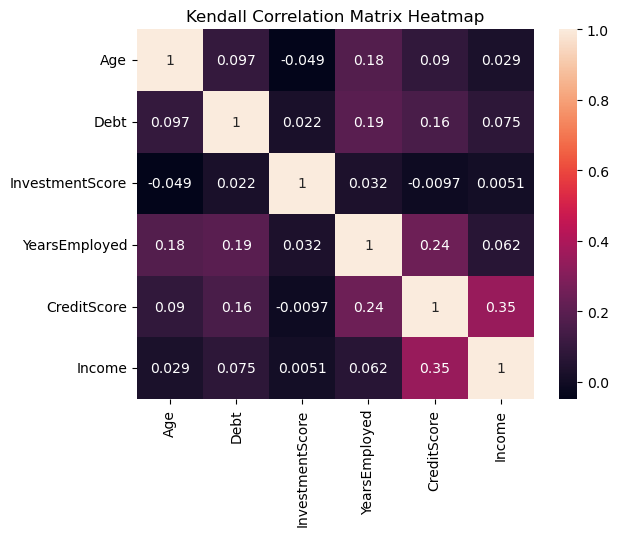

In [33]:
cols = ['Age', 'Debt', 'InvestmentScore', 'YearsEmployed', 'CreditScore', 'Income']
subset = ddf[cols]
corr_matrix = subset.corr(method='kendall')
sns.heatmap(corr_matrix, annot=True)
plt.title('Kendall Correlation Matrix Heatmap')
plt.show()

In [34]:
print('The highest positive correlation is between: CredirScore,Income')

The highest positive correlation is between: CredirScore,Income


### Q1.11

Create a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) showing the distribution of `Debt` for different ethnicities. Give it a title, name the axes. Which ethnicity has the highest median Debt?


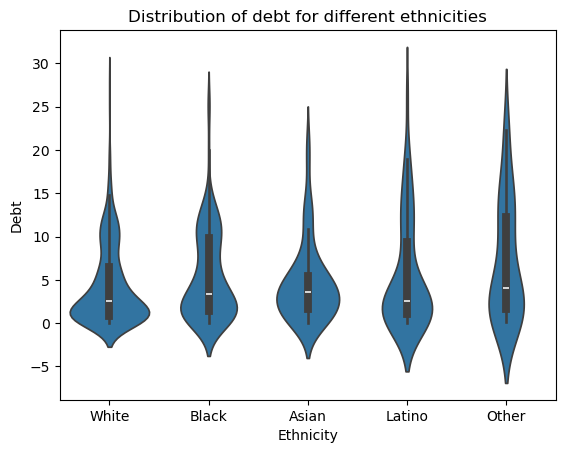

In [36]:
sns.violinplot(data=ddf, x="Ethnicity", y="Debt")
plt.title('Distribution of debt for different ethnicities')
plt.xlabel('Ethnicity')
plt.ylabel('Debt')
plt.show()

In [37]:
medians = df.groupby('Ethnicity')['Debt'].median().sort_values(ascending=False)
print(medians)

Ethnicity
Other     4.645
Asian     3.750
Black     3.250
Latino    2.540
White     2.500
Name: Debt, dtype: float64


In [38]:
print('Other')

Other


### Q1.12

Create a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for the features `Age`, `Income`, `Debt`. Use `Approved` as a hue. Based on that, conclude if such representation has predictive power relatively a credit approval. Write at least 4 sentences about different features and their pairs.

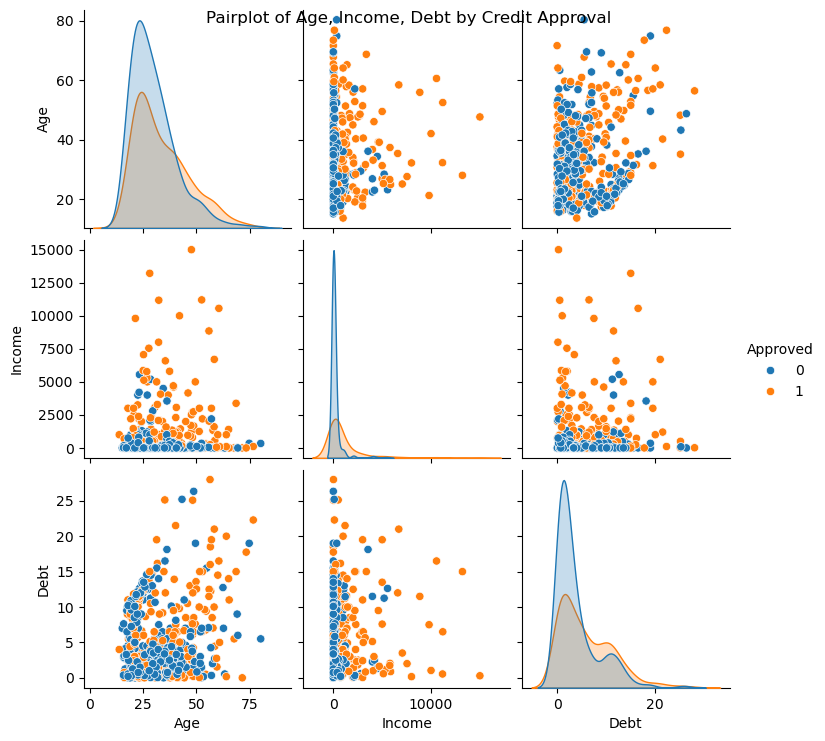

In [40]:
cols = ['Age', 'Income', 'Debt']
sns.pairplot(ddf, vars=cols, hue='Approved')
plt.suptitle('Pairplot of Age, Income, Debt by Credit Approval')
plt.show()

- Points with approved applications are more common near higher Income values and lower Debt values, while points with rejection are the opposite, with low incomes and high debts
- Age vs Income shows that approval of applications is more common among people with higher incomes, and with low incomes the application is more often rejected — age has little effect, however, you can notice several cases of approved applications for low income and older age (over 50 years)
- Debt vs Age shows a smaller difference in approvals, however, it is clear that applications with maximum debts from people of any age are more often rejected, but there are separate approvals for low debt in all ages
- The income distribution for those approved is shifted to the right, and the debt for them is shifted to the left

## 2. Preprocessing
The goal of the segment is to prepare data for further work

Make sure you have dropped the values required by **Q1.6, Q2.1**

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma without spaces and additional symbols.

Example for columns A, B: `A,B`

In [45]:
dupl_cols = []
columns = ddf.columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if ddf[columns[i]].equals(ddf[columns[j]]):
            dupl_cols.append((columns[i], columns[j]))
print(f'{dupl_cols[0][0]},{dupl_cols[0][1]}')

BankCustomer,BankRecord


In [46]:
ddf = ddf.drop('BankRecord', axis=1)

### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). What is the fraction of positive labels in the target (number of approved applications divided by the total number)?


In [48]:
target = ddf['Approved']
data = ddf.columns.drop('Approved')
data

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'InvestmentScore', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income', 'Start'],
      dtype='object')

In [49]:
target

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 683, dtype: int64

In [50]:
fraction = target.sum() / len(target)
print(f'Fraction of positive labels in the target: {fraction:.3f}')

Fraction of positive labels in the target: 0.439


### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be 40% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and **don't forget to shuffle and stratify by approval status**.
How many positive labels do you have in test targets?

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
target = ['Approved']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(ddf[data], ddf[target],
                             test_size=0.4, random_state=314,
                                 shuffle=True, stratify=ddf[target])

In [55]:
pos_test = y_test.sum()
print (f'Number of positive labels in test target: {pos_test.values[0]}')

Number of positive labels in test target: 120


## 3. Basic (not tuned) models

Let's start with the most basic models. **In this section,** we going to use `logistic regression`, `k neighbors classifier`, and `random forest` **without param tuning**.

Some of the features are not usable in the current form as categorical, so let's make a copy of a dataset with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

In [57]:
cols_to_drop = ['Industry', 'Ethnicity', 'Citizen', 'Start']

In [58]:
X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model on the test set?


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [61]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [62]:
y_pred = log_reg.predict(X_test.values)
f1 = f1_score(y_test, y_pred=y_pred)
print(f'f1-score:{f1:.3f}')

f1-score:0.851


### Q3.2

Build a k-neighbors classifier with 5 neighbors. What is the f1_score for the model on the test set?

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train.values, y_train.values.ravel())

KNeighborsClassifier()

In [66]:
y_pred = knn_cls.predict(X_test.values)
f1 = f1_score(y_test, y_pred=y_pred)
print(f'f1-score:{f1:.3f}')

f1-score:0.580


### Q3.3

Build a random forest classifier with `n_estimators = 5` and `random_state=314`. What is the f1_score for the model on the test set?

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_cls = RandomForestClassifier(n_estimators=5, random_state=314)
rf_cls.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier(n_estimators=5, random_state=314)

In [70]:
y_pred = rf_cls.predict(X_test.values)
f1 = f1_score(y_test, y_pred=y_pred)
print(f'f1-score:{f1:.3f}')

f1-score:0.810


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression above with the L2 norm. Use 5-split stratified cross-validation grid search to find the optimal C. You can use the verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model on the test dataset with this regularization?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with the same `random_state`. Choose `scoring='f1_macro'`.

Use `np.logspace(1e-5, 1e2, endpoint=True, num=10)` for the grid of parameters.

*Hint*. Use GridSearch fit / predict methods.

In [72]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [73]:
log_reg = LogisticRegression(penalty='l2', max_iter=5000)
param_dist = {'C': np.logspace(-5, 2, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
rs = RandomizedSearchCV(log_reg, param_distributions=param_dist, cv=skf, scoring='f1_macro', random_state=314)
rs.fit(X_train.values, y_train.values.ravel())
y_pred = rs.predict(X_test.values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'f1-score:{f1:.3f}')

f1-score:0.860


In [74]:
rs.best_params_

{'C': 0.4641588833612782}

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model on a test dataset with these parameters?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with the same `random_state`. Choose `scoring='f1_macro'`.
Use `{'n_neighbors' : np.arange(1, 20), 'weights' : ['uniform', 'distance'], 'p':[1, 2, 3]}` for the grid of parameters.

In [76]:
knn = KNeighborsClassifier()
param = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
rs = RandomizedSearchCV(knn, param_distributions=param, scoring='f1_macro', cv=skf, random_state=314)
rs.fit(X_train.values, y_train.values.ravel())
y_pred = rs.predict(X_test.values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'f1-score:{f1:.3f}')

f1-score:0.709


In [77]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 12}

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest on a test dataset with these parameters?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with the same `random_state`. Choose `scoring='f1_macro'`.

Use `{'n_estimators' : np.arange(5, 110, 10), 'max_features': np.arange(1, 14)}` for the grid of parameters.

In [79]:
rf = RandomForestClassifier(random_state=314)
param_dist = {
    'n_estimators': np.arange(5, 110, 10),
    'max_features': np.arange(1, 14)
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
rs = RandomizedSearchCV(rf, param_distributions=param_dist, scoring='f1_macro', cv=skf, random_state=314)
rs.fit(X_train.values, y_train.values.ravel())
y_pred = rs.predict(X_test.values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'f1-score:{f1:.3f}')

f1-score:0.871


In [80]:
rs.best_params_

{'n_estimators': 85, 'max_features': 9}

### Q3.7
For each model, report an increase of the metric after the application of GridSearch in percents.
*Sample Answer:* 0.123,4.567,0.789

In [82]:
f1_before_logreg = 0.851  
f1_after_logreg = 0.860  
f1_before_knn = 0.580 
f1_after_knn = 0.709   
f1_before_rf = 0.810  
f1_after_rf = 0.871  

In [83]:
def func(before, after):
    return ((after - before) / before) * 100

In [84]:
logreg_ = func(f1_before_logreg, f1_after_logreg)
knn_ = func(f1_before_knn, f1_after_knn)
rf_ = func(f1_before_rf, f1_after_rf)

print(f"{logreg_:.3f},{knn_:.3f},{rf_:.3f}")

1.058,22.241,7.531


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

Don't forget to delete initial categorical features. Use [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) or [one hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). How many columns do we have now?

In [87]:
cols = ['Industry', 'Ethnicity', 'Citizen']
new = []
for col in cols:
    feat = pd.get_dummies(ddf[col])
    new += list(feat.columns)
    ddf = pd.concat([ddf, feat], axis=1)
ddf.drop(columns=cols, inplace=True)
cols = new

In [88]:
ddf.shape[1]

37

### Q4.2

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [90]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income']

In [91]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
m = X_test['Income'].max()
print(f"Maximum value of Income in the test set: {m:.3f}")

Maximum value of Income in the test set: 5.815


### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. This means you have to run GridSearch one more time. What is the f1 score now? Use the same grid of parameters as before.

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
optimal_C = 0.464
log_reg = LogisticRegression(penalty='l2', max_iter=5000, C=optimal_C)
param_grid = {'C': np.array([optimal_C])}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
gs = GridSearchCV(log_reg, param_grid, scoring='f1_macro', cv=skf)
gs.fit(X_train.values, y_train.values.ravel())
y_pred = gs.predict(X_test.values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Updated f1-score after GridSearch: {f1:.3f}')

Updated f1-score after GridSearch: 0.864


### Q4.4

Do the same task as in **Q4.3** but for the following subset of features: 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'. What is the f1 score now?

Save prediction labels and the probabilities of classes to a separate array (will be used in Q4.6).

In [96]:
subset = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
                   'InvestmentScore', 'YearsEmployed', 'PriorDefault',
                   'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']
optimal_C = 0.464
log_reg = LogisticRegression(penalty='l2', max_iter=5000, C=optimal_C)
param_grid = {'C': np.array([optimal_C])}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
gs = GridSearchCV(log_reg, param_grid, scoring='f1_macro', cv=skf)
gs.fit(X_train[subset].values, y_train.values.ravel())
y_pred = gs.predict(X_test[subset].values)
y_prob = gs.predict_proba(X_test[subset].values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1:.3f}')
y_pred_logreg = y_pred
y_prob_logreg = y_prob

F1 score: 0.864


### Q4.5

Train a k-NN with **updated** optimal params. Use the same set of features as in Q4.3. What is the f1 score now?
Save prediction labels and the probabilities of classes to a separate array (will be used in Q4.6).

In [98]:
subset = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
                   'InvestmentScore', 'YearsEmployed', 'PriorDefault',
                   'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']
optimal_params = {
    'n_neighbors': 12,
    'weights': 'distance',
    'p': 1
}
knn = KNeighborsClassifier(**optimal_params)
knn.fit(X_train[subset].values, y_train.values.ravel())
y_pred = knn.predict(X_test[subset].values)
y_prob = knn.predict_proba(X_test[subset].values)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1:.3f}')
y_pred_knn = y_pred
y_prob_knn = y_prob

F1 score: 0.831


### Q4.6

Another popular performance metric is the ROC curve. Build a roc-curve for logistic regression and KNN from Q4.4, Q4.5 on the sample plot. How much do their TPRs differ when FPR=0.3? *(approximately, up to the number of the form $0.025k, k \in \mathbb Z$)*?

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

In [101]:
probs_logreg = y_prob_logreg[:, 1]
probs_knn = y_prob_knn[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, probs_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)

def interp(fpr, tpr, threshold=0.3):
    idx = np.abs(fpr - threshold).argmin()
    return tpr[idx]

tpr_logreg_03 = interp(fpr_logreg, tpr_logreg, 0.3)
tpr_knn_03 = interp(fpr_knn, tpr_knn, 0.3)

diff = abs(tpr_logreg_03 - tpr_knn_03)
print(f"difference TPR: {diff:.3f}")

difference TPR: 0.008


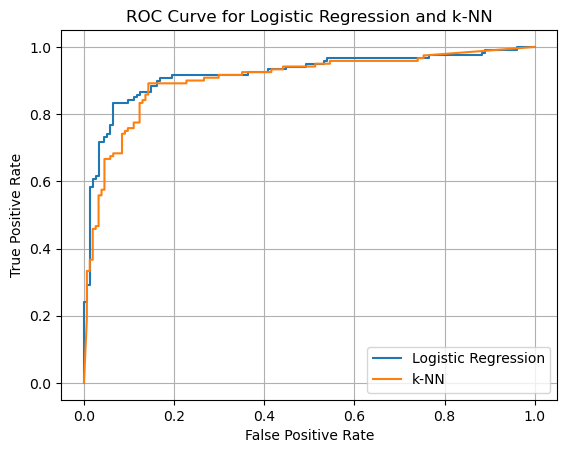

In [102]:
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='k-NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression and k-NN')
plt.legend()
plt.grid()
plt.show()

In [103]:
roc_auc_logreg = roc_auc_score(y_test, probs_logreg)
roc_auc_knn = roc_auc_score(y_test, probs_knn)
print(f'{roc_auc_logreg:.3f}, {roc_auc_knn:.3f}')

0.921, 0.904


### Q5.1

Analyze the results from Q4.3 - Q4.6.

- Does our preprocessing improve the metric for logistic regression? Why?
- Does our preprocessing improve the metric for KNN? Why?
- Is such preprocessing compulsory for Random Forest?
- Which model is better in terms of ROC-AUC score, Logistic Regression or KNN?

- Preprocessing had little effect and only slightly improved the f1-score (by 0.47%) for logistic regression. This is probably due to the fact that the linear model is less sensitive to different feature scales, as it searches for a linear combination
- At the same time, preprocessing significantly improved the f1-score for the knn model (by 21.44%), which may be due to the fact that the knn method is based on calculating distances between objects. If the features are not normalized, features with large numerical values distort the search for nearest neighbors
- Data preprocessing is not mandatory when working with Random Forest models, as it is resistant to outliers and does not require scaling, unlike distance-based or linear models
- Logistic regression has a higher ROC-AUC, which means that, on average, it distinguishes classes better

### Q5.2

Propose two derivative features and retrain one of the models with them.
- What is the performance?
- Justify your choice of these features in terms of banking and finance.

In [107]:
subset = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
                   'InvestmentScore', 'YearsEmployed', 'PriorDefault',
                   'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']
X_train['DebtToIncome'] = X_train['Debt'] / (X_train['Income'] + 1)
X_test['DebtToIncome'] = X_test['Debt'] / (X_test['Income'] + 1)

X_train['AgetoYearsEmployed'] = X_train['Age'] / (X_train['YearsEmployed'] + 1) 
X_test['AgetoYearsEmployed'] = X_test['Age'] / (X_test['YearsEmployed'] + 1)
newsubset = subset + ['DebtToIncome', 'AgetoYearsEmployed']
log_reg = LogisticRegression(penalty='l2', max_iter=5000, C=optimal_C)
log_reg.fit(X_train[newsubset], y_train.values.ravel())
y_pred = log_reg.predict(X_test[newsubset])
f1 = f1_score(y_test, y_pred, average='macro')
print(f'new f1 score: {f1:.3f}')

new f1 score: 0.868


As a result, the f1 score improved by 0.5%

- Debt to Income Ratio - used in credit scoring to assess the borrower's ability to pay
- The Age to YearsEmployed Ratio indicates a late start to a career or frequent job changes and can serve as an important factor in assessing credit risk.

### Q5.3

Train an xboost model with test f1 score 0.85+

In [111]:
from xgboost import XGBClassifier